# Comprehensive Analysis and Predictive Modeling of Car Features and Prices

#### Before we begin:

If you liked my work, please upvote this kernel since it will encourage me to perform more in-depth research and analysis for various datasets. I am open to any comments and suggestions to improve the notebook and analysis.


### Introduction:
    
In this notebook, we will use random forests to measure how accurate they are in predicting the price of a vehicle. We have the raw dataset, and we can start analyzing some important aspects of it.

### Table of Contents:

1. Summary
2. Problem Definition
3. Data Gathering
4. Preprocessing Data <br>
   4a. Filtering<br>
   4b. Cleaning<br>
   4c. Manipulation of Data<br>
5. Exploratory Data Analysis
6. Feature Engineering
7. Extra Trees Regression
8. Results and Conclusion



### 1. Summary

A popular automobile dealership in the area has hired a team of data scientists to assist them in finding a solution to a very niche problem they are facing. This dealership sells variety of cars of myriad body types, makes and conditions (used/new)  to cater the need of their customers.
In this analysis, we will be focusing on better marketing campaign and supply chain optimization of the dealership:

- Increase product purchases of specific make of car which have been on decline
- Extract the underlying factors that dictate the pricing of such cars
- Increase in company sales and profits (based on the first two goals)


### 2. Problem Definition

The automobile dealership is currently noticing a steep decline in the valuation of some specific make and models of cars such as Mazda (CX-5), Volvo (Q3 and XC90) and Mitsubishi (L200). The dealership is curious to know the underlying factors related to the decline in the valuation of the cars and ways to mitigate it. By performing analysis, we seek to provide actionable insights for the dealership enabling them to make informed decisions based on the analysis of these critical factors.


### 3. Data Gathering

Data was obtained from the dealership which consists of all their past sales from the year 2012 thru 2021. The data is not limited to Mazda, Volvo and Mitsubishi so we will need to preprocess the data to better fit the need of the problem definition.

The data was obtained and consisted of 1 .rdata file.

We import the data by parsing the rdata file using the rdata module and then importing it in pandas in python.


In [95]:
import rdata

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

parsed = rdata.parser.parse_file('car_ads_fp.RData')
converted = rdata.conversion.convert(parsed)
raw_data = converted['carAd']

/Users/ashutoshwagh/anaconda3/lib/python3.11/site-packages/rdata/conversion/_conversion.py:294: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn("Unknown encoding. Assumed ASCII.")  # noqa: B028


## 4. Preprocessing Data

#### 4a. Filtering Data

The raw contains 268255 entries with 16 attributes. Since, the dealership’s requirements is to analyze the specific set of cars which satisfy the conditions below.

1. Vehicle make -> Mitsubishi L200, Audi Q3, Mazda CX-5, and Volvo XC90.
2. Body type sport utility vehicle (SUV) and pickup trucks.
3. Fuel type Petrol, Diesel





Let's remove any duplicate entries in the dataset

In [96]:
print("Entries in data: {}".format(raw_data['Maker'].count()))
raw_data = raw_data.drop_duplicates()
print("Entries after removing duplciates: {}".format(raw_data['Maker'].count()))

Entries in data: 268255
Entries after removing duplciates: 268255


Looks like there were no duplicate records in the dataset which is good news.

We will now filter the data to hone in on the relevant entries that we need for analysis. To get the largest sample while satisfying the given conditions, we will only focus on top 6 on demand colors of the cars.

As we can see, the most in demand colors of cars are Black, Silver, Blue, Grey, White and Red in such the same order.

In [97]:
raw_data['Color'].value_counts().head(6)

Color
Black     48751
Silver    40214
Blue      38376
Grey      37678
White     34270
Red       25987
Name: count, dtype: int64

In [98]:
d1 = raw_data[raw_data['Color'].isin(['Black','Silver','Blue','Grey','White','Red'])] 
d2 = d1[d1['Fuel_type'].isin(['Petrol','Diesel'])] 
d3 = d2[d2['Bodytype'].isin(['SUV','Pickup'])] 
d4 = d3[d3['Genmodel'].isin(['L200','Q3', 'CX-5','XC90'])] 
raw_data = d4

Now that we have the relevant data, let's start the cleaning process.

Let's take a look at the data first

In [99]:
raw_data.head()


,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num
103650,Mazda,CX-5,57_7,57_7$$1,2018.0,7.0,Blue,2013.0,SUV,106980,2.2L,Automatic,Diesel,10500,5.0,5.0
103651,Mazda,CX-5,57_7,57_7$$2,2018.0,8.0,Blue,2015.0,SUV,29500,2.2L,Manual,Diesel,13995,5.0,5.0
103652,Mazda,CX-5,57_7,57_7$$3,2018.0,7.0,Black,2016.0,SUV,11388,2.2L,Automatic,Diesel,20995,5.0,5.0
103653,Mazda,CX-5,57_7,57_7$$4,2018.0,2.0,White,2017.0,SUV,5472,2.2L,Manual,Diesel,23900,5.0,5.0
103654,Mazda,CX-5,57_7,57_7$$5,2018.0,5.0,White,2017.0,SUV,4500,2.2L,Automatic,Diesel,28990,5.0,5.0


In [100]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3391 entries, 103650 to 264902
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Maker         3391 non-null   string 
 1   Genmodel      3391 non-null   string 
 2   Genmodel_ID   3391 non-null   string 
 3   Adv_ID        3391 non-null   string 
 4   Adv_year      3391 non-null   float64
 5   Adv_month     3391 non-null   float64
 6   Color         3391 non-null   object 
 7   Reg_year      3391 non-null   float64
 8   Bodytype      3391 non-null   object 
 9   Runned_Miles  3391 non-null   object 
 10  Engin_size    3387 non-null   object 
 11  Gearbox       3391 non-null   object 
 12  Fuel_type     3391 non-null   object 
 13  Price         3391 non-null   string 
 14  Seat_num      3278 non-null   float64
 15  Door_num      3375 non-null   float64
dtypes: float64(5), object(6), string(5)
memory usage: 450.4+ KB


#### 4b. Cleaning Data

It can be observed that some attributes are not in correct format such as year, month etc.

Let's transform such attributes to the correct format

In [101]:
#Function to convert data to integer format

def make_integer(x):
    if None:
        return
    return int(x)

#Function to convert data to float format
def make_float(x):
    if None:
        return
    return float(x)

#Function to convert enginer size to integer
def make_engine_integer(x):
    if x is None:
        return
    return float(x[:-1])

In [102]:
raw_data['Adv_year'] = raw_data['Adv_year'].apply(make_integer)
raw_data['Reg_year'] = raw_data['Reg_year'].apply(make_integer)
raw_data['Adv_month'] = raw_data['Adv_month'].apply(make_integer)
raw_data['Runned_Miles'] = d4['Runned_Miles'].apply(make_float)
raw_data['Runned_Miles'] = raw_data['Runned_Miles'].apply(make_integer)
raw_data['Price'] = raw_data['Price'].apply(make_float)
raw_data['Engin_size'] = d4['Engin_size'].apply(make_engine_integer)

/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/1380870394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Adv_year'] = raw_data['Adv_year'].apply(make_integer)
/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/1380870394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Reg_year'] = raw_data['Reg_year'].apply(make_integer)
/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/1380870394.py:3: SettingWithCopyWarning: 
A value is trying to 

In [103]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3391 entries, 103650 to 264902
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Maker         3391 non-null   string 
 1   Genmodel      3391 non-null   string 
 2   Genmodel_ID   3391 non-null   string 
 3   Adv_ID        3391 non-null   string 
 4   Adv_year      3391 non-null   int64  
 5   Adv_month     3391 non-null   int64  
 6   Color         3391 non-null   object 
 7   Reg_year      3391 non-null   int64  
 8   Bodytype      3391 non-null   object 
 9   Runned_Miles  3391 non-null   int64  
 10  Engin_size    3387 non-null   float64
 11  Gearbox       3391 non-null   object 
 12  Fuel_type     3391 non-null   object 
 13  Price         3391 non-null   float64
 14  Seat_num      3278 non-null   float64
 15  Door_num      3375 non-null   float64
dtypes: float64(4), int64(4), object(4), string(4)
memory usage: 450.4+ KB


Let's fill in the missing values in the data. 
Before that let's create a heatmap to find out which attributes have a missing value.



#### 4c. Data Manipulation

It can be noticed that we do not have much missing data however, # of seats, doors and engine size for some entries are missing. Moreover, the missing engine size and # doors attribute rows are miniscule. Hence, we can drop those rows. Unfortunately, for # seats we cannot do that as the data loss in deleting rows would be significant. 

<Axes: >

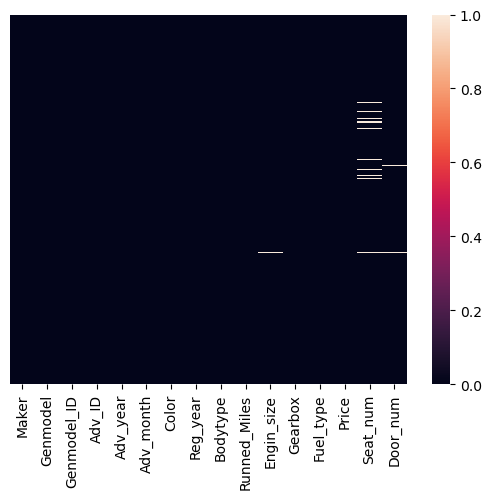

In [104]:
sns.heatmap(raw_data.isnull(), yticklabels = False)

In [105]:
#Lets remove missing engine_size

raw_data.dropna(subset = 'Engin_size', inplace =True)

/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/356442390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data.dropna(subset = 'Engin_size', inplace =True)


In [106]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, 103650 to 264902
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Maker         3387 non-null   string 
 1   Genmodel      3387 non-null   string 
 2   Genmodel_ID   3387 non-null   string 
 3   Adv_ID        3387 non-null   string 
 4   Adv_year      3387 non-null   int64  
 5   Adv_month     3387 non-null   int64  
 6   Color         3387 non-null   object 
 7   Reg_year      3387 non-null   int64  
 8   Bodytype      3387 non-null   object 
 9   Runned_Miles  3387 non-null   int64  
 10  Engin_size    3387 non-null   float64
 11  Gearbox       3387 non-null   object 
 12  Fuel_type     3387 non-null   object 
 13  Price         3387 non-null   float64
 14  Seat_num      3278 non-null   float64
 15  Door_num      3375 non-null   float64
dtypes: float64(4), int64(4), object(4), string(4)
memory usage: 449.8+ KB


In [107]:
#we will fill the average value of seats in a car by category
raw_data['Seat_num']=raw_data['Seat_num'].fillna(raw_data.groupby('Bodytype')['Seat_num'].transform('mean'))
raw_data['Seat_num'] = raw_data['Seat_num'].apply(lambda x: round(x))

/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/1151069694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Seat_num']=raw_data['Seat_num'].fillna(raw_data.groupby('Bodytype')['Seat_num'].transform('mean'))
/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/1151069694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Seat_num'] = raw_data['Seat_num'].apply(lambda x: round(x))


In [108]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, 103650 to 264902
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Maker         3387 non-null   string 
 1   Genmodel      3387 non-null   string 
 2   Genmodel_ID   3387 non-null   string 
 3   Adv_ID        3387 non-null   string 
 4   Adv_year      3387 non-null   int64  
 5   Adv_month     3387 non-null   int64  
 6   Color         3387 non-null   object 
 7   Reg_year      3387 non-null   int64  
 8   Bodytype      3387 non-null   object 
 9   Runned_Miles  3387 non-null   int64  
 10  Engin_size    3387 non-null   float64
 11  Gearbox       3387 non-null   object 
 12  Fuel_type     3387 non-null   object 
 13  Price         3387 non-null   float64
 14  Seat_num      3387 non-null   int64  
 15  Door_num      3375 non-null   float64
dtypes: float64(3), int64(5), object(4), string(4)
memory usage: 449.8+ KB


In [109]:
#Filling in missing #door values
#SUV's are prominently 5 door so we will fill missing door for SUV as 5 ,pickup 4

raw_data['Door_num'] = raw_data.apply(lambda row:5 if np.isnan(row['Door_num']) and row['Bodytype'] =='SUV' else row['Door_num'], axis = 1)
raw_data['Door_num'] = raw_data.apply(lambda row:4 if np.isnan(row['Door_num']) and row['Bodytype'] =='Pickup' else row['Door_num'], axis =1)
raw_data['Door_num'] = raw_data['Door_num'].apply(lambda x: round(x))

/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/1343811993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Door_num'] = raw_data.apply(lambda row:5 if np.isnan(row['Door_num']) and row['Bodytype'] =='SUV' else row['Door_num'], axis = 1)
/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/1343811993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Door_num'] = raw_data.apply(lambda row:4 if np.isnan(row['Door_num']) and row['Bodytype'] =='Pickup' else 

Now's let's visualize the data to ensure there are no values missing.

<Axes: >

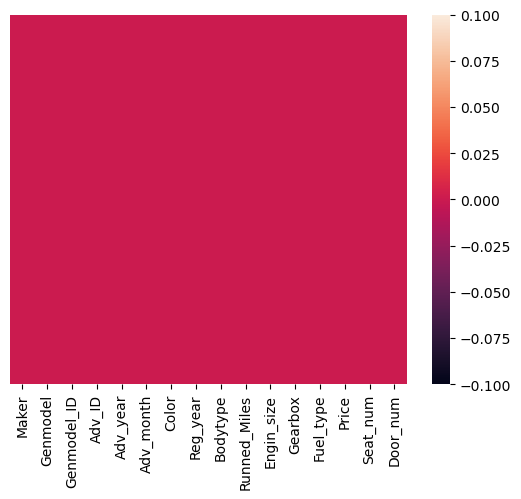

In [110]:
sns.heatmap(raw_data.isnull(), yticklabels =False)

In [111]:
raw_data.head()

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num
103650,Mazda,CX-5,57_7,57_7$$1,2018,7,Blue,2013,SUV,106980,2.2,Automatic,Diesel,10500.0,5,5
103651,Mazda,CX-5,57_7,57_7$$2,2018,8,Blue,2015,SUV,29500,2.2,Manual,Diesel,13995.0,5,5
103652,Mazda,CX-5,57_7,57_7$$3,2018,7,Black,2016,SUV,11388,2.2,Automatic,Diesel,20995.0,5,5
103653,Mazda,CX-5,57_7,57_7$$4,2018,2,White,2017,SUV,5472,2.2,Manual,Diesel,23900.0,5,5
103654,Mazda,CX-5,57_7,57_7$$5,2018,5,White,2017,SUV,4500,2.2,Automatic,Diesel,28990.0,5,5


Since gearbox and Bodytype are binary categorical variables, let us encode them for analysis.

In [112]:
#Encode the categorical variables
def binary_encode(x):
    if x =='Automatic':
        return 1
    return 0

def binary_encode_type(x):
    if x == "SUV":
        return 1
    return 0

def binary_encode_fuel_type(x):
    if x == "Diesel":
        return 1
    return 0

raw_data['Gearbox'] = raw_data['Gearbox'].apply(binary_encode)
raw_data['Bodytype'] = raw_data['Bodytype'].apply(binary_encode_type)
raw_data['Fuel_type'] = raw_data['Fuel_type'].apply(binary_encode_fuel_type)



/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/647610265.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Gearbox'] = raw_data['Gearbox'].apply(binary_encode)
/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/647610265.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Bodytype'] = raw_data['Bodytype'].apply(binary_encode_type)
/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/647610265.py:19: SettingWithCopyWarning: 
A value is tryin

In [113]:
raw_data.head()

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,Fuel_type,Price,Seat_num,Door_num
103650,Mazda,CX-5,57_7,57_7$$1,2018,7,Blue,2013,1,106980,2.2,1,1,10500.0,5,5
103651,Mazda,CX-5,57_7,57_7$$2,2018,8,Blue,2015,1,29500,2.2,0,1,13995.0,5,5
103652,Mazda,CX-5,57_7,57_7$$3,2018,7,Black,2016,1,11388,2.2,1,1,20995.0,5,5
103653,Mazda,CX-5,57_7,57_7$$4,2018,2,White,2017,1,5472,2.2,0,1,23900.0,5,5
103654,Mazda,CX-5,57_7,57_7$$5,2018,5,White,2017,1,4500,2.2,1,1,28990.0,5,5


## Summary

1. Observing the data, it is surprising to see that the SUV constitute to almost 72% of the car while pickup trucks contribute to 28%. Thus, there is imbalanced class of body type in data.

2. The Makes of the car are relatively evenly proportioned with Mitsubishi and Audi being the top number of cars in the data with over 28% and 27% respectively.

3. The gearbox type in car is also relatively proportionally spread with 47% as the automatic while the rest manual. 


## 5. Exploratory Data Analysis

/Users/ashutoshwagh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


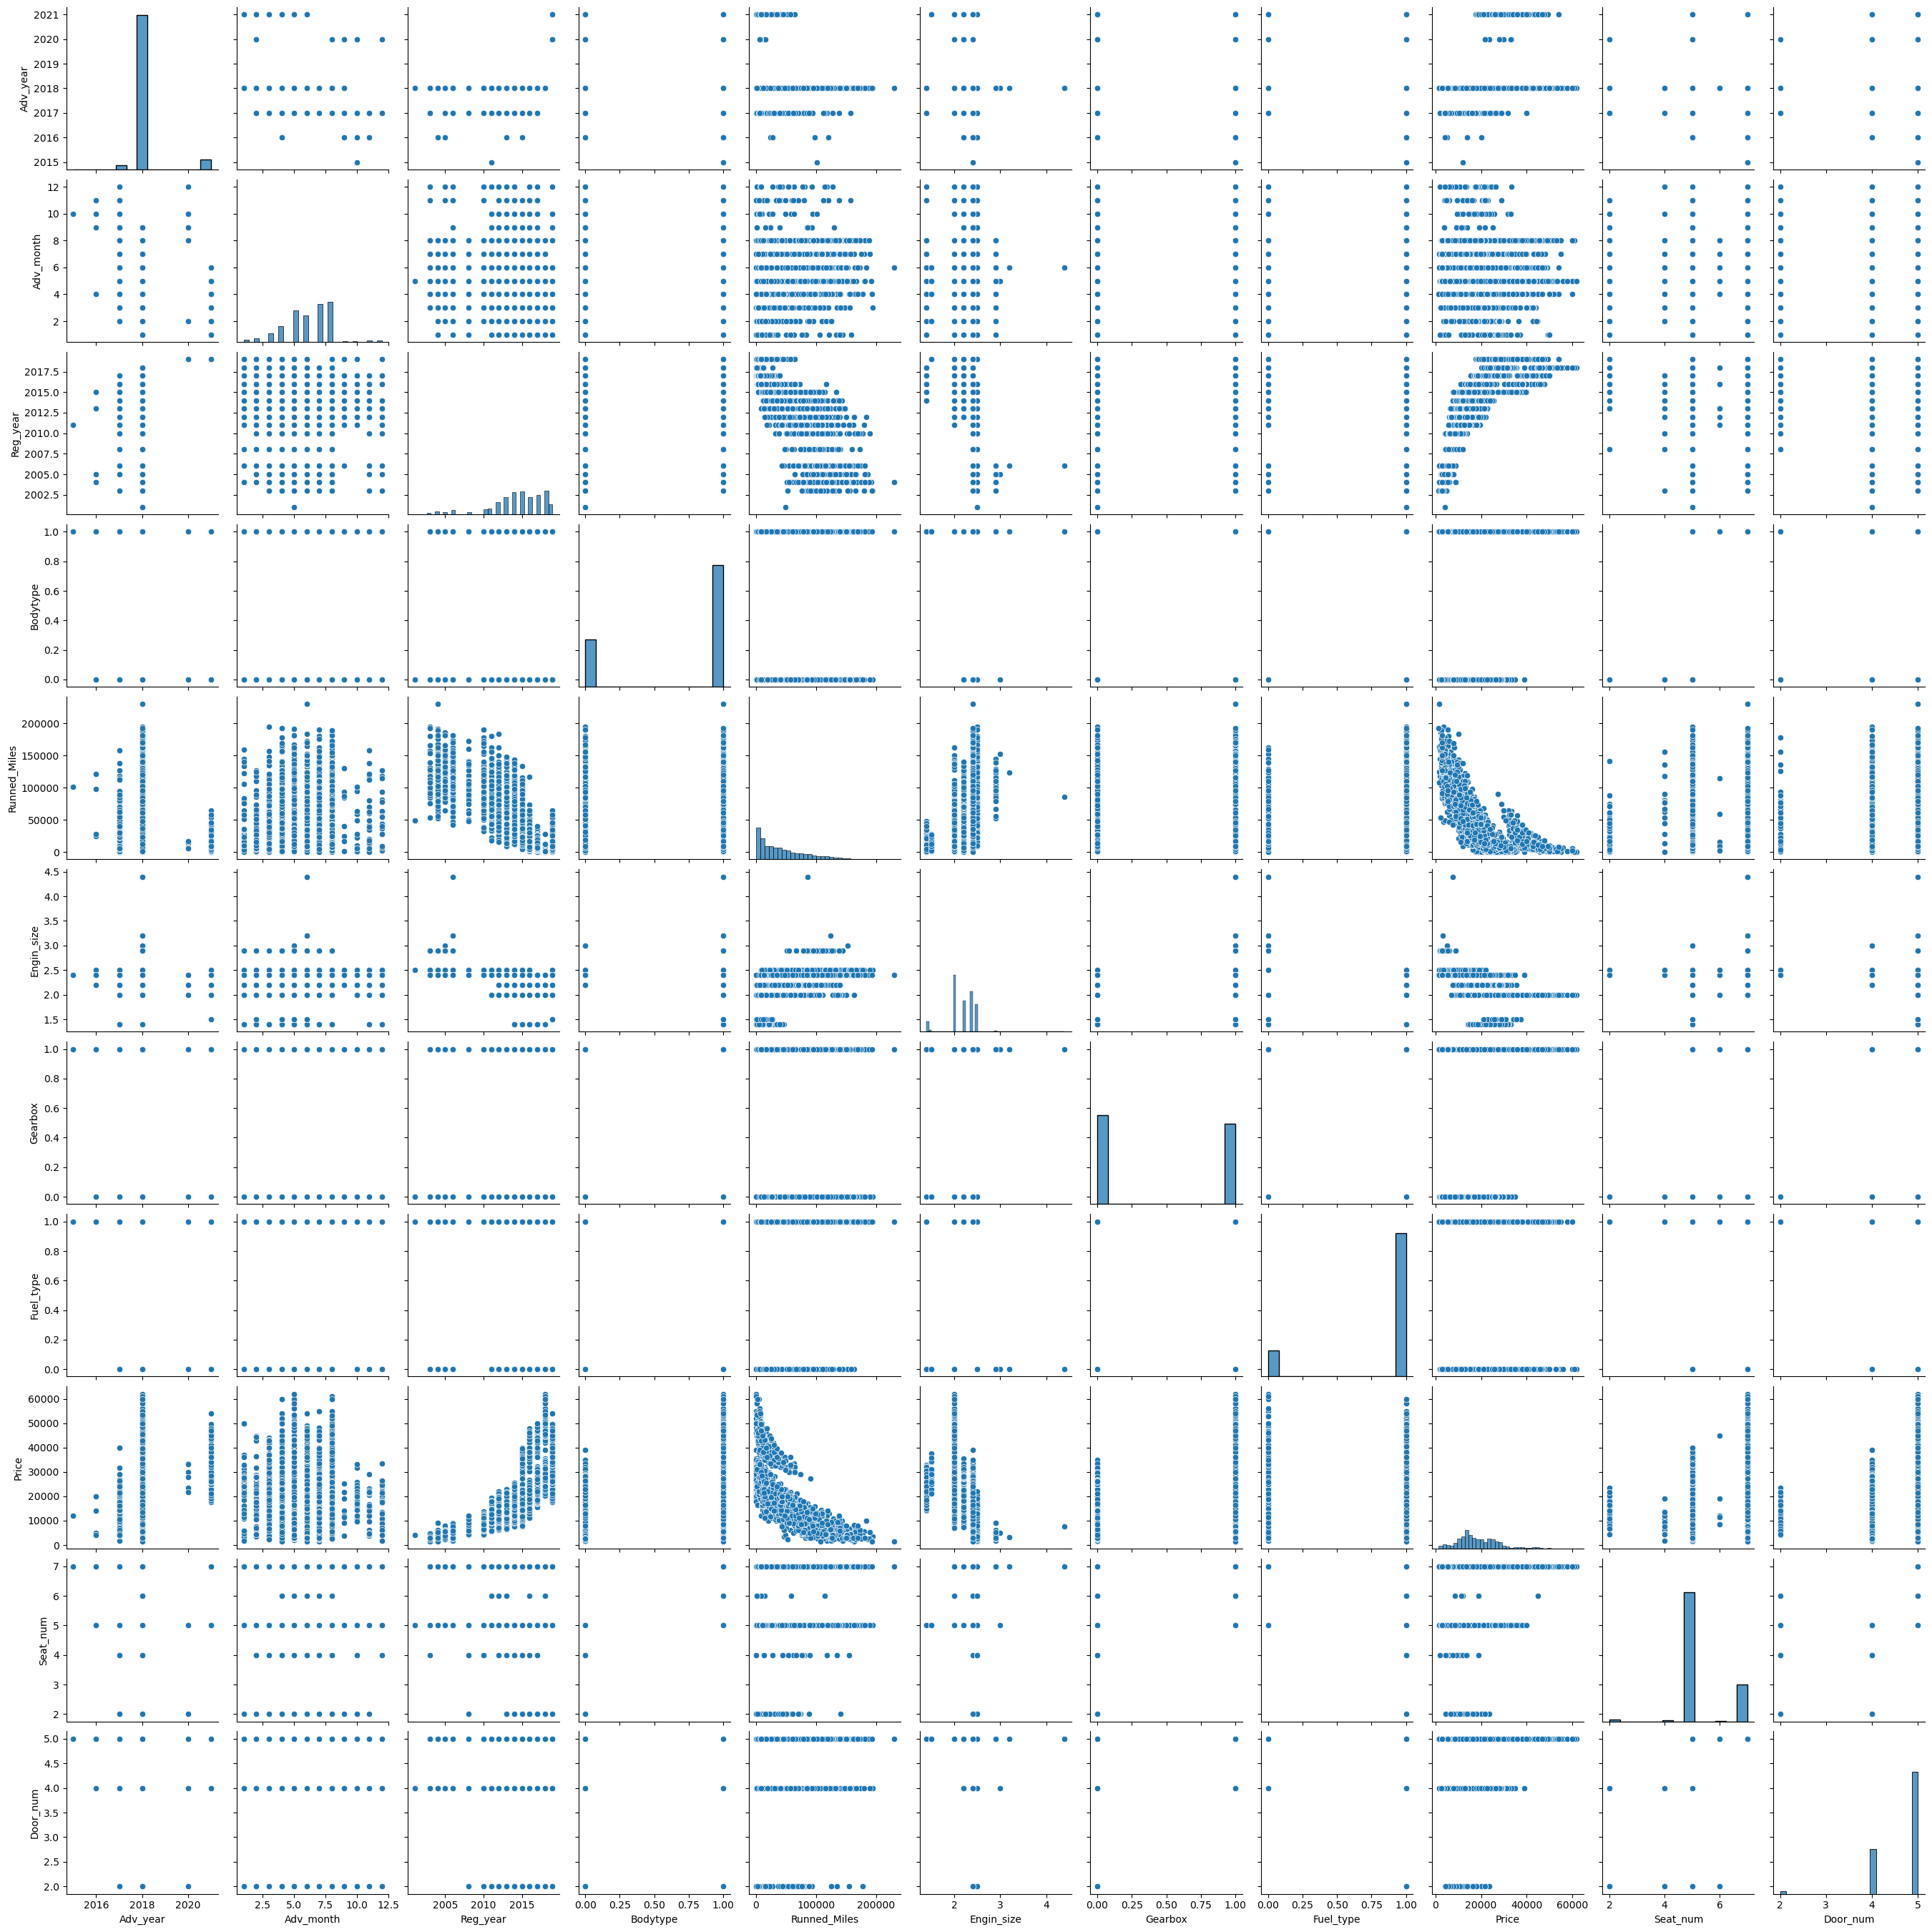

In [114]:
sns.pairplot(raw_data)

Let's take a look at price distribution of the cars

/var/folders/1x/_c94hmfx2pg1d_kks8rvh56c0000gn/T/ipykernel_38979/900126344.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

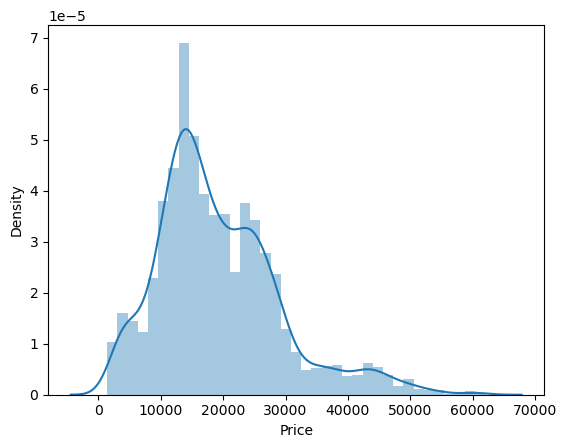

In [115]:
sns.distplot(raw_data['Price'])

It is observable that the distribution of car prices lies towards lower end of the range with the most between $10k-25k

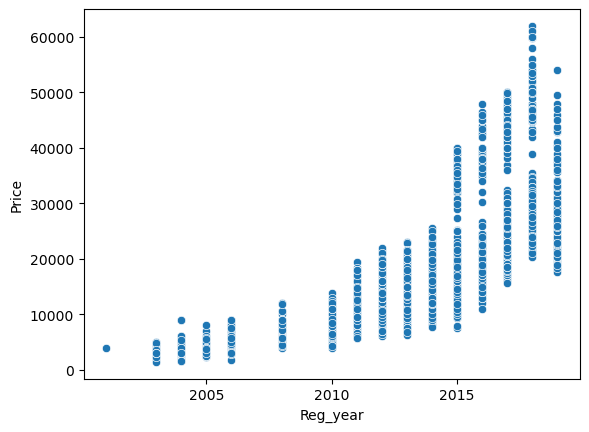

In [116]:
ax = sns.scatterplot(data= raw_data,x = 'Reg_year', y= 'Price')
ax.locator_params(integer=True)
plt.show()

It is clear that if the car was registered in the later years, then the prices are significantly higher than the older cars. In other words, latest cars are pricier than the older ones.

<Axes: xlabel='Runned_Miles', ylabel='Count'>

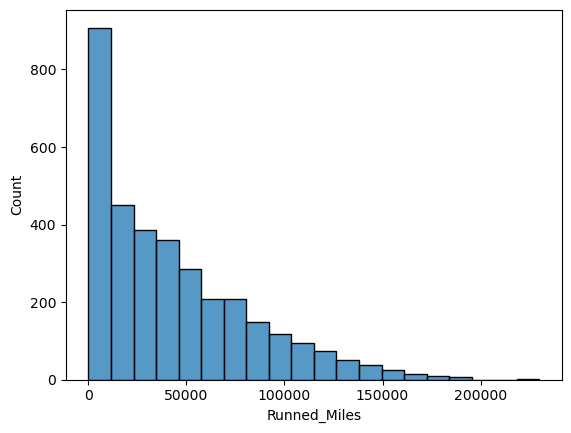

In [117]:
sns.histplot(data = raw_data,x = 'Runned_Miles',bins = 20)

We see most cars are maximum cars are within the 10000 miles range. It could be fair to say that most cars are a year old if we assume average yearly running miles of 12000.

<Axes: xlabel='Runned_Miles', ylabel='Price'>

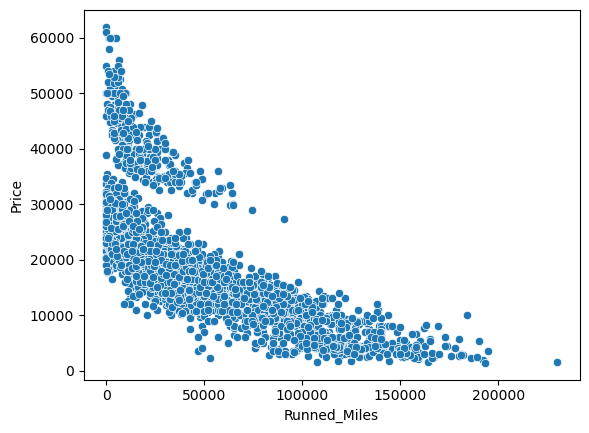

In [139]:
sns.scatterplot(data=raw_data, x='Runned_Miles',y='Price')

Interesting! We can see that there are 2 groups of distributions. Firstly, for the cars in the price range of under $38000 and for the other over $38000. However, for both distributions, it is noticeable that the more the 'runned_miles' on a car, the lesser the car's market value.

## 6. Feature Engineering

In [119]:
from sklearn.ensemble import ExtraTreesClassifier

In [120]:
clf = ExtraTreesClassifier(n_estimators = 100,
                                        criterion ='entropy', max_features = "sqrt", random_state=21)

In [121]:
raw_data.columns

Index(['Maker', 'Genmodel', 'Genmodel_ID', 'Adv_ID', 'Adv_year', 'Adv_month',
       'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Seat_num', 'Door_num'],
      dtype='object')

In [122]:
#Removing redundant attributes such as model id and adv id
data = raw_data[['Adv_year', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Seat_num', 'Door_num']]

In [123]:
y = raw_data['Price']

In [124]:
clf.fit(data,y)

ExtraTreesClassifier(criterion='entropy', random_state=21)

In [125]:
feature_importance = clf.feature_importances_
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        clf.estimators_],
                                        axis = 0)

In [126]:
feature_importance = pd.DataFrame(data = feature_importance_normalized,index = data.columns,columns = ["Importance (Normalized)"]).sort_values('Importance (Normalized)',ascending=False)

In [127]:
feature_importance

,Importance (Normalized)
Reg_year,0.023144
Runned_Miles,0.020593
Bodytype,0.017783
Door_num,0.016444
Engin_size,0.013318
Seat_num,0.009362
Gearbox,0.005542
Adv_year,0.004871
Fuel_type,0.003912


<Axes: xlabel='Importance (Normalized)'>

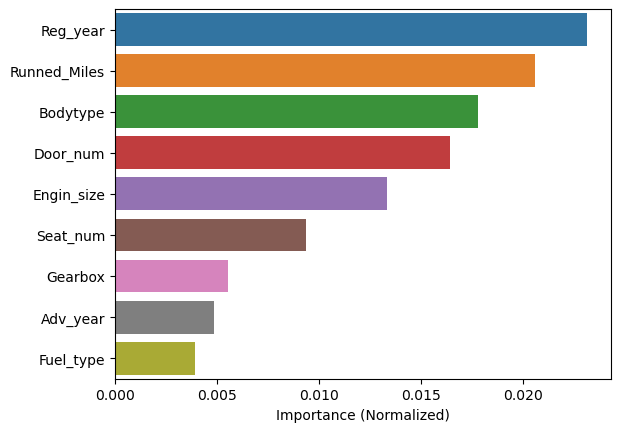

In [128]:
sns.barplot(feature_importance, x="Importance (Normalized)", y=feature_importance.index)

Now, let's train the ExtraTressClassifier on the clean data and measure the results.

## 7. Extra Tress Regression

In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

In [130]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size = 0.2,random_state = 0)

In [131]:
reg = ExtraTreesRegressor(n_estimators = 100, random_state = 21).fit(X_train,y_train)

In [132]:
price_train_pred = reg.predict(X_train)
price_test_pred = reg.predict(X_test)

## 8. Results and Conclusion

In [133]:
mse = mean_squared_error(y_test,price_test_pred)

In [134]:
print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,price_train_pred),
mean_squared_error(y_test,price_test_pred)))

MSE train data: 222713.097, MSE test data: 6038548.944


In [135]:
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,price_train_pred),
r2_score(y_test,price_test_pred)))

R2 train data: 0.998, R2 test data: 0.937


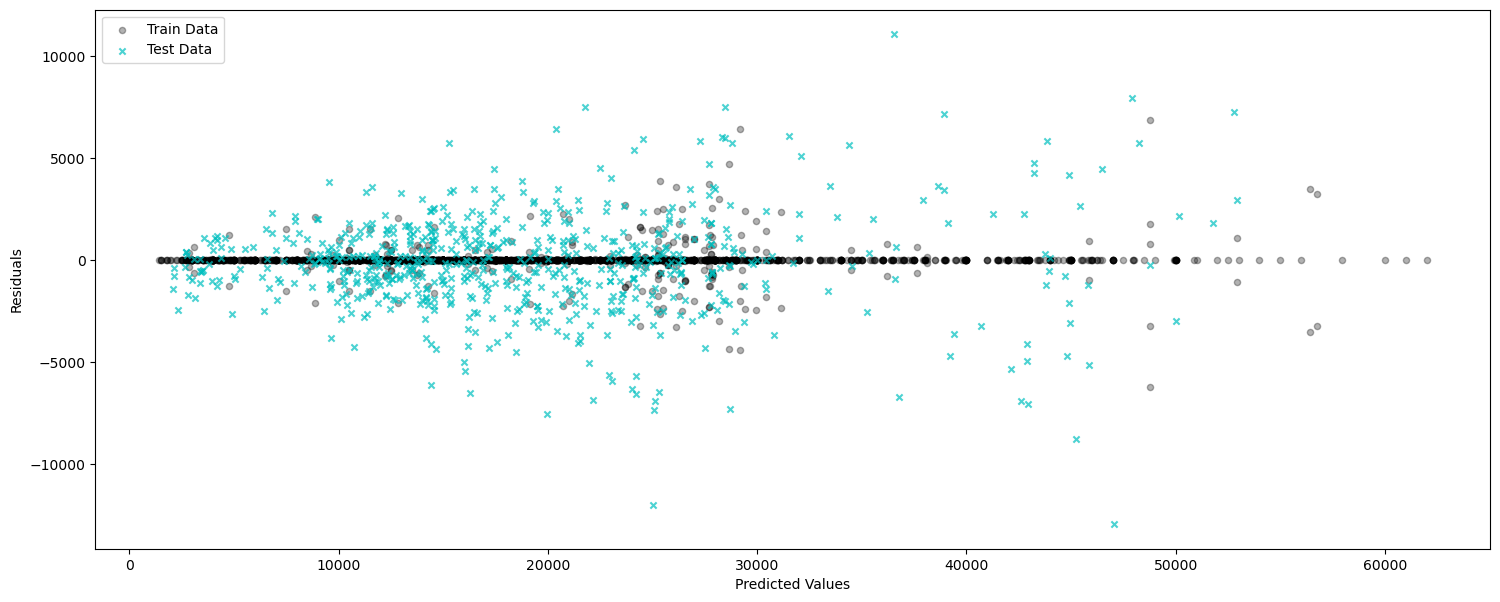

In [136]:
plt.figure(figsize = (18,7))

plt.scatter(price_train_pred,price_train_pred-y_train, c= 'black', marker = 'o', s= 20, alpha= 0.3, label = 'Train Data')
plt.scatter(price_test_pred,price_test_pred-y_test, c= 'c', marker = 'x', s = 20, alpha=0.7, label = 'Test Data')

plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.show()

We can see the residuals are pretty low for the data points below 28k but starts to increase as we move
towards higher predicted price values.

We can conclude that the year, running miles and body type are the top 3 most contributing factors to a cars resale price value. However, our model is provides pretty good results for the car prices under the USD 20000 range and starts to deteriorate as we go towards the higher valued cars. One factor to this could be the imbalance of the price range in the data. We see that most of the cars are under the USD 20000 range. I will have research on this and gather data for the higher end cars.

Thank you so much for going through my work.